<center><h1>Inteligencia Artificial</header1></center>

Presentado por: Luis Olalla  <br>
Fecha: 27/0/22

# Importación de librerias necesarias

In [105]:
#Para esta actividad se importarán las siguientes librerías:
#libreria pandas
import pandas as pd
#importar libreria numpy
#Liberia encoder
from sklearn.preprocessing import LabelEncoder
import numpy as np
# import the necessary models
from sklearn import datasets
#importar libreria de entrenamiento
from sklearn.model_selection import train_test_split
#importar liberia svm
from sklearn import svm
#importar liberia de metricas
from sklearn import metrics

## Cargar el Dataset

In [106]:
#Código para cargar el Dataset
df = pd.read_csv("estres.csv")
#Mostramos los datos
df.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


## Descripción de la fuente del Dataset

In [107]:
#Descripcion de datos del dataset 
df.describe()

,Humidity,Temperature,Step count,Stress Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


## Explique el problema a resolver. 

**Descripción del problema**

En base a la actividad física del ser humano, aquí se detectan y analizan los niveles de estrés del ser humano. Se proporciona un conjunto de datos de 2001 muestras para la humedad del cuerpo humano, la temperatura corporal y la cantidad de pasos dados por el usuario.

**Variable dependiente  Y o variable objetivo**

Stress Level = Categorica, (0 = Estrés bajo, 1 = Estrés normal, 2 = Estrés alto).

**Variables de entrada x**

Humidity: Es dato continuo, humedad del cuerpo humano.

Temperature = Es dato continuo, Temperatura corporal.

Step Count =  Es dato continuo, Cantidad de pasos dados.

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


In [108]:
#Código que responde a la descripción anterior
#NUMERO DE INSTANCIAS
df.count()

Humidity        2001
Temperature     2001
Step count      2001
Stress Level    2001
dtype: int64

Humidity: Es dato continuo, humedad del cuerpo humano.

Temperature = Es dato continuo, Temperatura corporal.

Step Count =  Es dato continuo, Cantidad de pasos dados.


Stress Level = Categorica, (0 = Estrés bajo, 1 = Estrés normal, 2 = Estrés alto).  

In [109]:
#informacion de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step count    2001 non-null   int64  
 3   Stress Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


<AxesSubplot:>

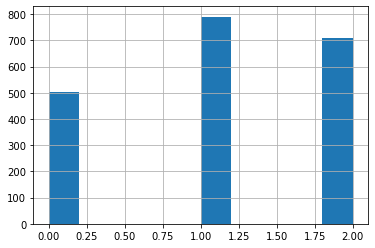

In [110]:
#Histograma 
df['Stress Level'].hist()

Tenemos varias columnas de nuestra variable objetivo y observamos que se encuentran separadas, por lo cual podemos definir que debemos aplicar clasificación para poder determinar.

In [111]:
#Contar los nulos
df.isnull().sum()

Humidity        0
Temperature     0
Step count      0
Stress Level    0
dtype: int64

In [112]:
#contar vacios
df.isna().sum()

Humidity        0
Temperature     0
Step count      0
Stress Level    0
dtype: int64

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [113]:
#Transformación de las caracteristicas (mire el apartado Feature engineering del aula virtual)
#Cambiar los datos a categoricos 
df = df.astype('category')
#Mostrar los nuevos datos
df.dtypes

Humidity        category
Temperature     category
Step count      category
Stress Level    category
dtype: object

In [114]:
#tranformar los datos para su uso
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

df.head()

,Humidity,Temperature,Step count,Stress Level
0,1133,1133,123,1
1,1141,1141,93,1
2,1712,1712,196,2
3,1764,1764,177,2
4,87,87,87,0


In [144]:
#Verificacion y limpieza 
# Variable x  y variable y del dataset
entradaX = ['Humidity', 'Temperature','Step count']
#Vairable Y
objetivoY =['Stress Level']
#Asignar a las variables de entrada de X
X = df[entradaX]
#Asignr a la variable objetivo
y= df[objetivoY]

In [145]:
### Estandarización de la data ###
from sklearn.preprocessing import StandardScaler
VariablesEntradaScaler=StandardScaler()
VariableObjetivoScaler=StandardScaler()

In [146]:
#Almacenamiento del objeto de ajuste para referencia posterior
VariablesEntradaFit=VariablesEntradaScaler.fit(X)
VariableObjetivoFit=VariableObjetivoScaler.fit(y)

In [147]:
#Generación de los valores estandarizados de X e y
X=VariablesEntradaFit.transform(X)
y=VariableObjetivoFit.transform(y)

## División del dataset en datos de entrenamiento y datos de test 

In [148]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
y = df["Stress Level"].values
#Se muesta los valores de entrada
x = df.drop(["Stress Level"], axis=1).values
#Se divide y entrena
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

## Modelamiento

In [149]:
#Códo del modelo
#Almacenamos los datos
clf = svm.SVC(kernel='linear')

In [150]:
#Entrenamiento
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [151]:
#Test
y_pred = clf.predict(x_test)

## Evaluación del Modelo

Obtenemos un resultado de Accuracy de 1.0 por lo cual podemos definir que el modelo esta sobre entrenado, no podemos sacar los valores de precisión y recall ya que nuestra variable objetivo contiene multiclases.

In [152]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))



Accuracy: 1.0
